<a href="https://colab.research.google.com/github/ericmuga253/ML_1/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:


# Use 'on_bad_lines' instead of 'error_bad_lines' for pandas versions 1.0.0 and above
df = pd.read_csv('/content/Financial_ Application_ Behavior_ Dataset.csv', on_bad_lines='skip')
# 'skip' will skip bad lines, you can also use 'warn' to issue a warning

df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [4]:
missing_values = df.isnull().sum()
print(missing_values)

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64


<Axes: >

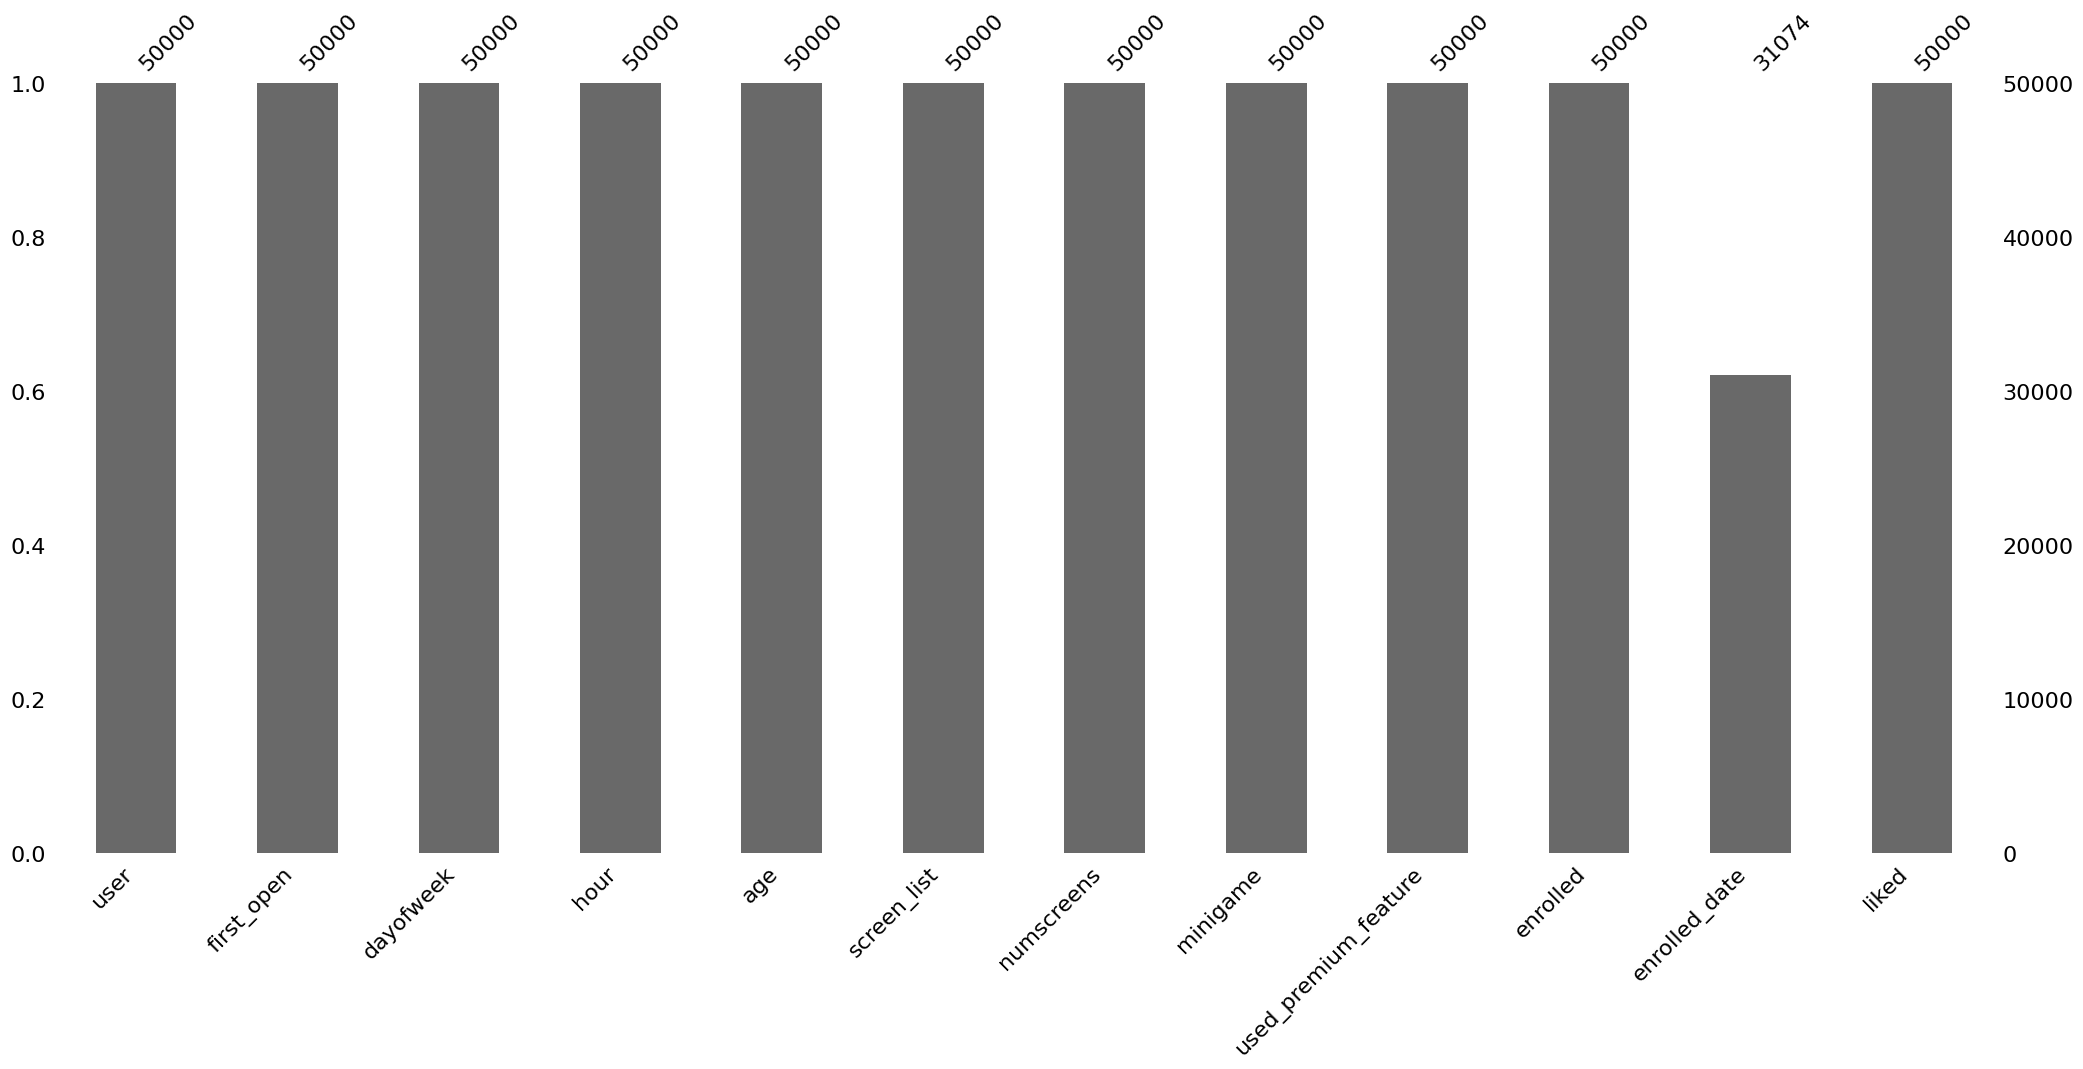

In [5]:
msno.bar(df)

<Axes: >

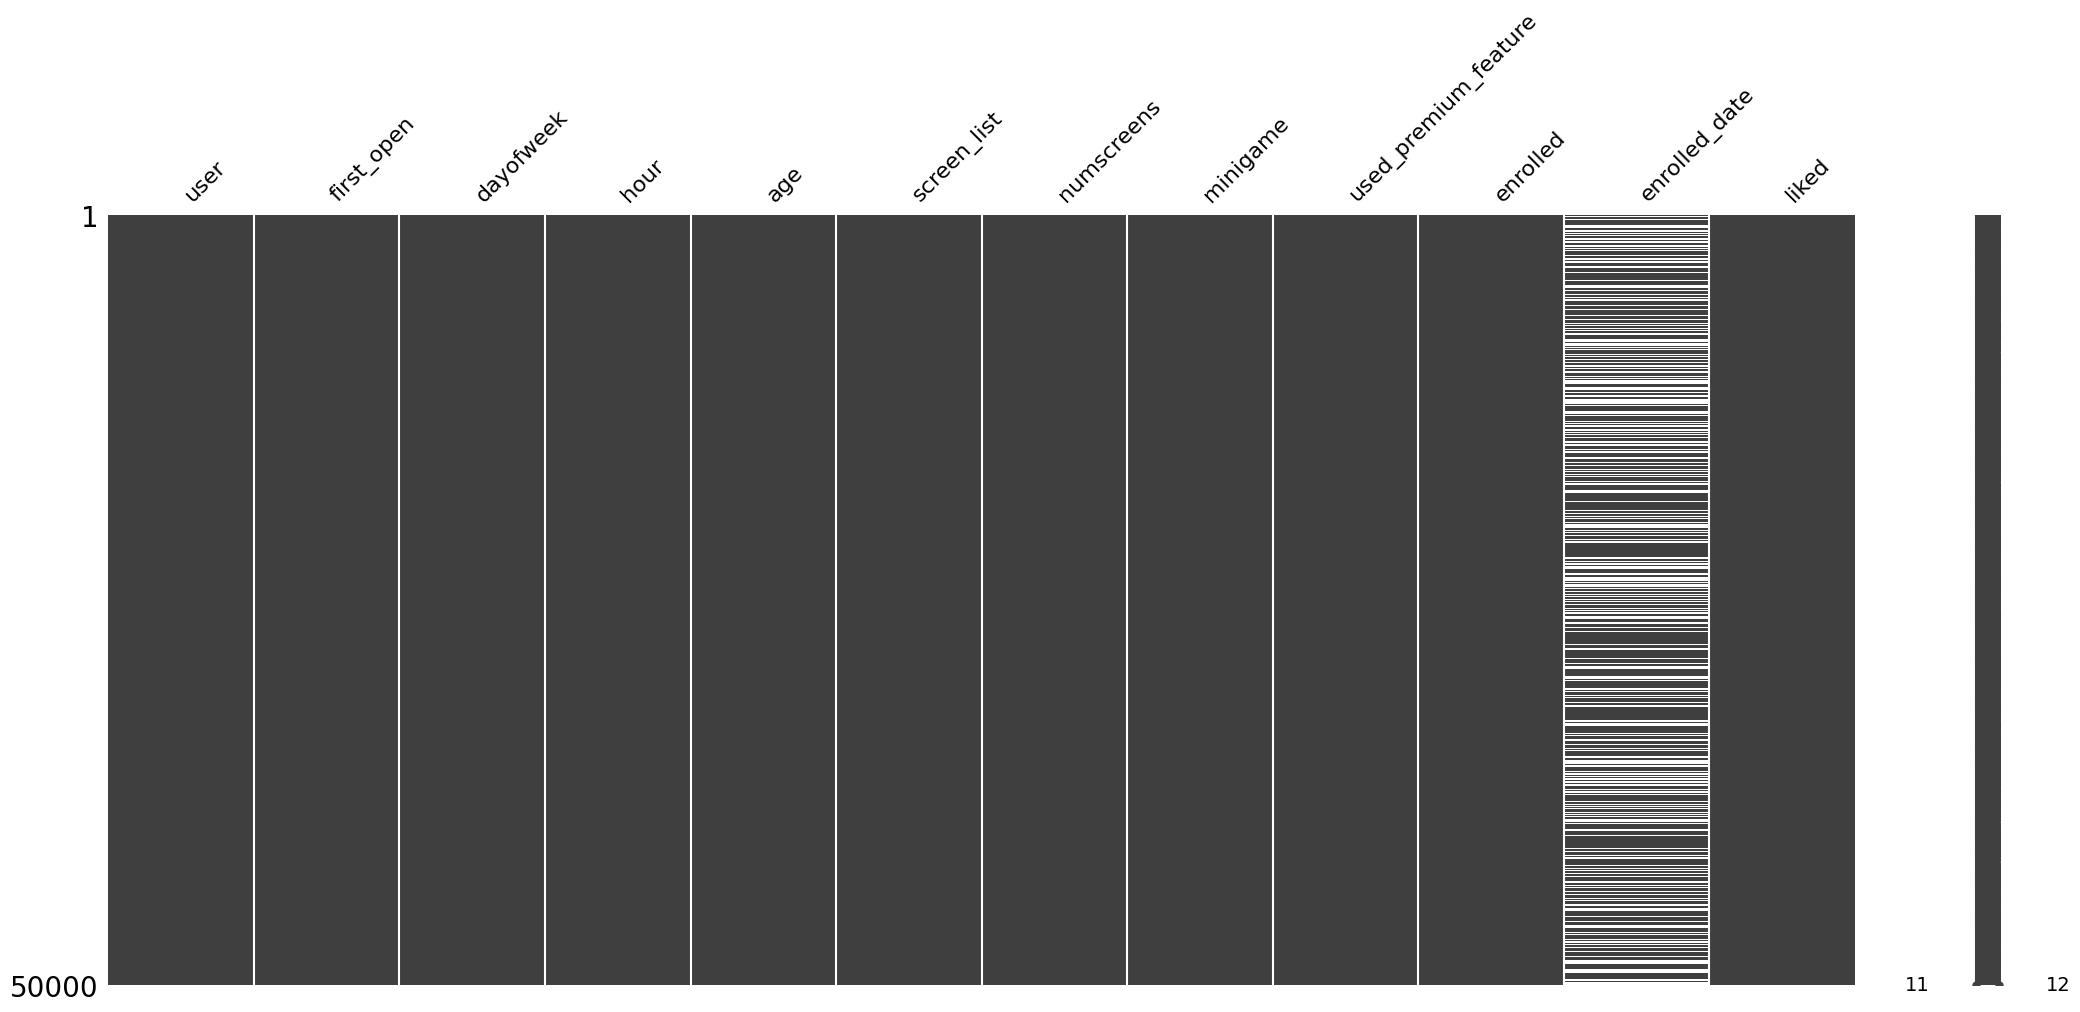

In [6]:
msno.matrix(df)

In [7]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [8]:


# Convert day of week to datetime
df['dayofweek'] = pd.to_datetime(df['dayofweek'], format='%w')

# Locate and drop duplicates
# First, let's see how many duplicates we have
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Now, let's drop the duplicates and reset the index
df = df.drop_duplicates().reset_index(drop=True)

print(f"Shape of DataFrame after removing duplicates: {df.shape}")

# If you want to drop duplicates based on specific columns, you can do:
# df = df.drop_duplicates(subset=['column1', 'column2']).reset_index(drop=True)

# Verify the day of week conversion
print(df['dayofweek'].dtype)

Number of duplicate rows: 15
Shape of DataFrame after removing duplicates: (49985, 12)
datetime64[ns]


In [9]:




# Convert 'enrolled_date' to datetime
df['enrolled_date'] = pd.to_datetime(df['enrolled_date'], errors='coerce')

# Check for null values before filling
null_before = df['enrolled_date'].isnull().sum()
print(f"Null values before filling: {null_before}")

# Forward fill missing values
df['enrolled_date'] = df['enrolled_date'].fillna(method='ffill')

# If there are still null values at the beginning, fill with the earliest date
if df['enrolled_date'].isnull().any():
    earliest_date = df['enrolled_date'].min()
    df['enrolled_date'] = df['enrolled_date'].fillna(earliest_date)

# Check for null values after filling
null_after = df['enrolled_date'].isnull().sum()
print(f"Null values after filling: {null_after}")

# Verify the conversion
print(df['enrolled_date'].dtype)

# Display some sample data
print(df['enrolled_date'].head())

Null values before filling: 18918
Null values after filling: 0
datetime64[ns]
0   2012-11-23 00:53:10.346
1   2012-11-23 00:53:10.346
2   2012-11-23 00:53:10.346
3   2013-07-05 16:11:49.513
4   2013-02-26 18:56:37.841
Name: enrolled_date, dtype: datetime64[ns]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49985 entries, 0 to 49984
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user                  49985 non-null  int64         
 1   first_open            49985 non-null  object        
 2   dayofweek             49985 non-null  datetime64[ns]
 3   hour                  49985 non-null  object        
 4   age                   49985 non-null  int64         
 5   screen_list           49985 non-null  object        
 6   numscreens            49985 non-null  int64         
 7   minigame              49985 non-null  int64         
 8   used_premium_feature  49985 non-null  int64         
 9   enrolled              49985 non-null  int64         
 10  enrolled_date         49985 non-null  datetime64[ns]
 11  liked                 49985 non-null  int64         
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 4.6+ MB


In [11]:
df = df.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)
df.head(6) # head of numeric dataFrame

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,1900-01-01,02:00:00,23,15,0,0,0,0
1,1900-01-01,01:00:00,24,13,0,0,0,0
2,1900-01-01,19:00:00,23,3,0,1,0,1
3,1900-01-01,16:00:00,28,40,0,0,1,0
4,1900-01-01,18:00:00,31,32,0,0,1,1
5,1900-01-01,09:00:00,20,14,0,0,1,0


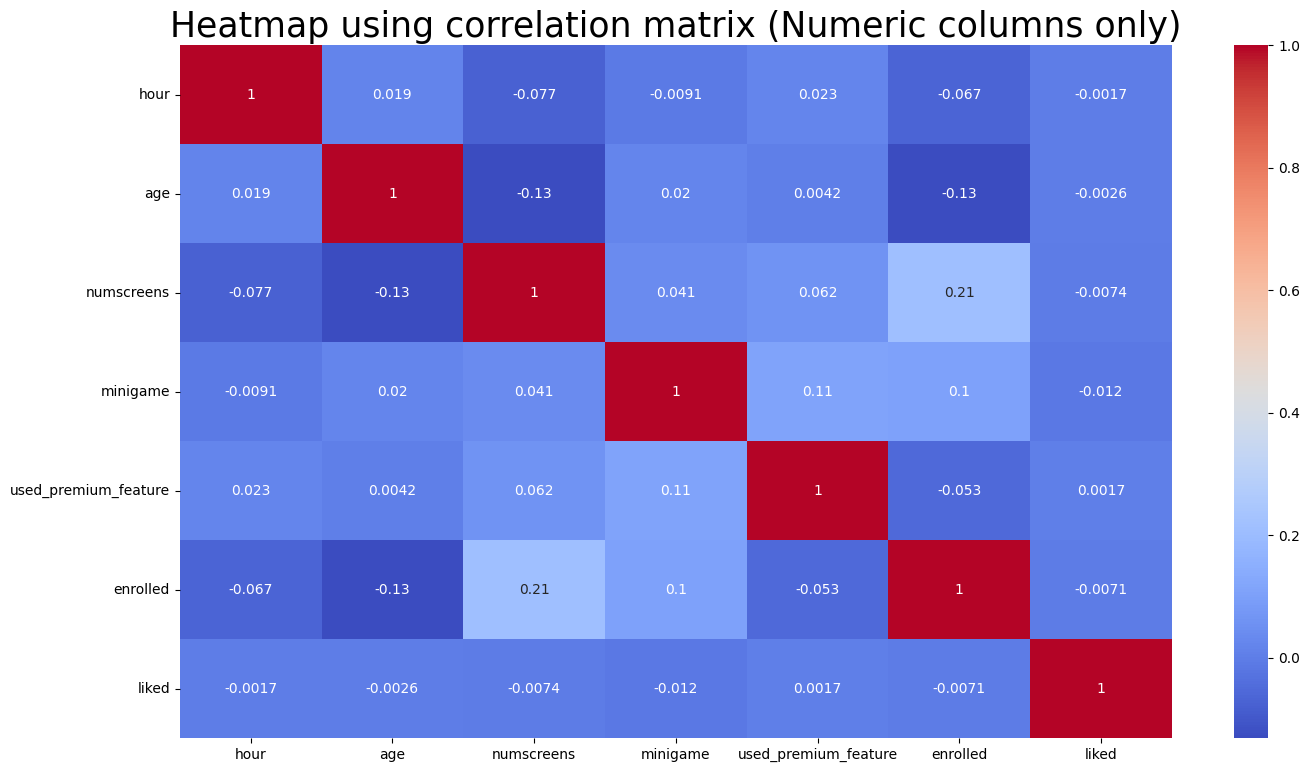

In [12]:
df['hour'] = df['hour'].str.strip()

# Now, let's convert 'hour' to numeric
df['hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

# Ensure all columns are numeric
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Create correlation matrix
plt.figure(figsize=(16, 9))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap using correlation matrix (Numeric columns only)", fontsize=25)
plt.show()

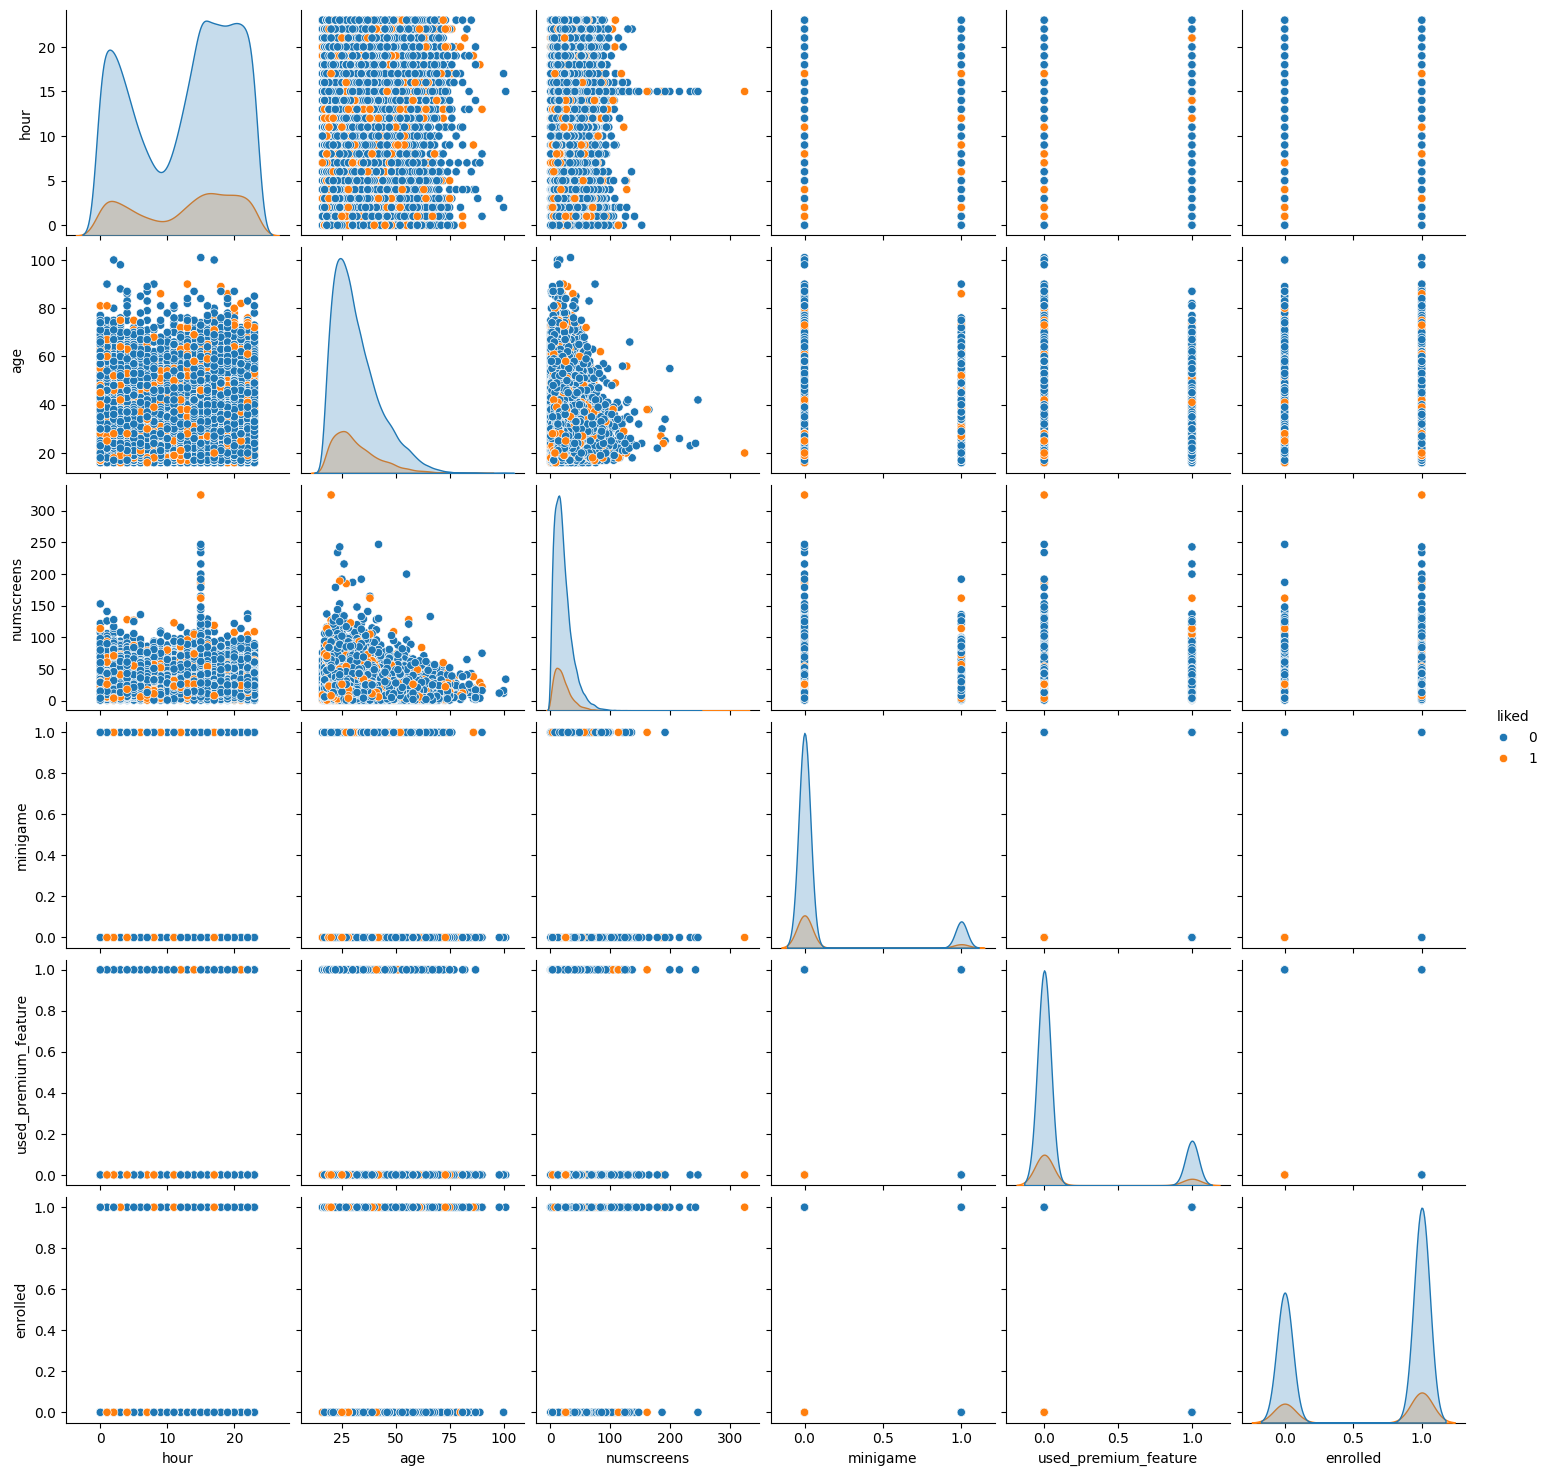

In [13]:
sns.pairplot(df,hue='liked')
plt.show()

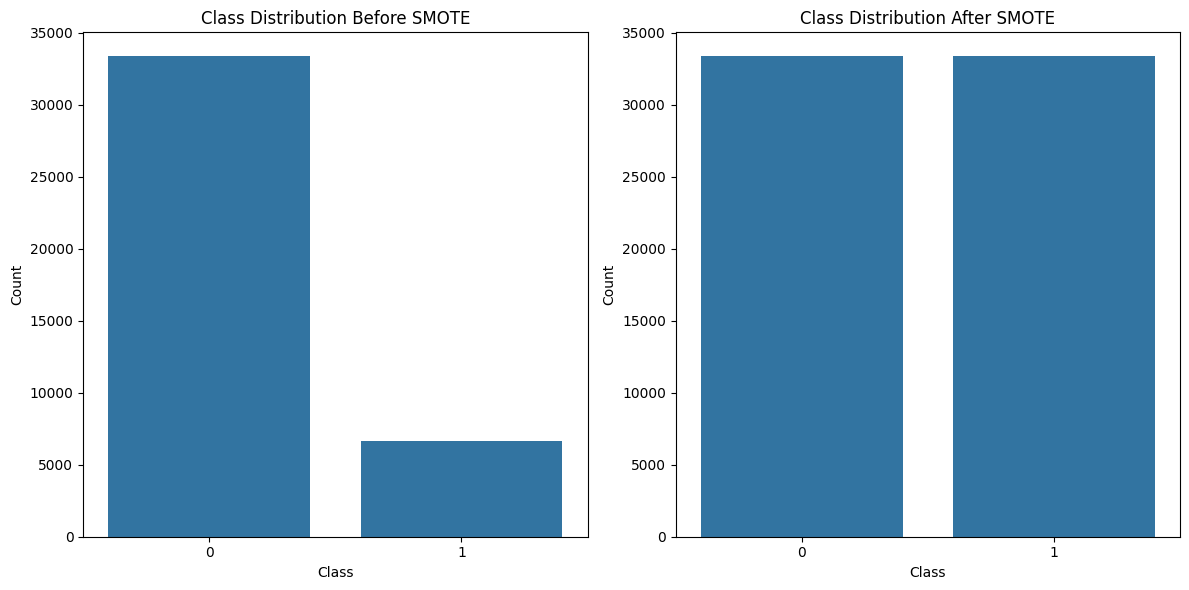

Class distribution before SMOTE:
liked
0    33359
1     6629
Name: count, dtype: int64

Class distribution after SMOTE:
liked
0    33359
1    33359
Name: count, dtype: int64


In [14]:




# Separate features and target
X = df.drop('liked', axis=1)
y = df['liked']

# Identify numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns

# Keep only numeric columns for SMOTE
X = X[numeric_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Prepare data for visualization
before_balance = y_train.value_counts().sort_index()
after_balance = pd.Series(y_train_resampled).value_counts().sort_index()

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create subplots
plt.subplot(1, 2, 1)
sns.barplot(x=before_balance.index, y=before_balance.values)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=after_balance.index, y=after_balance.values)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print exact counts
print("Class distribution before SMOTE:")
print(before_balance)
print("\nClass distribution after SMOTE:")
print(after_balance)

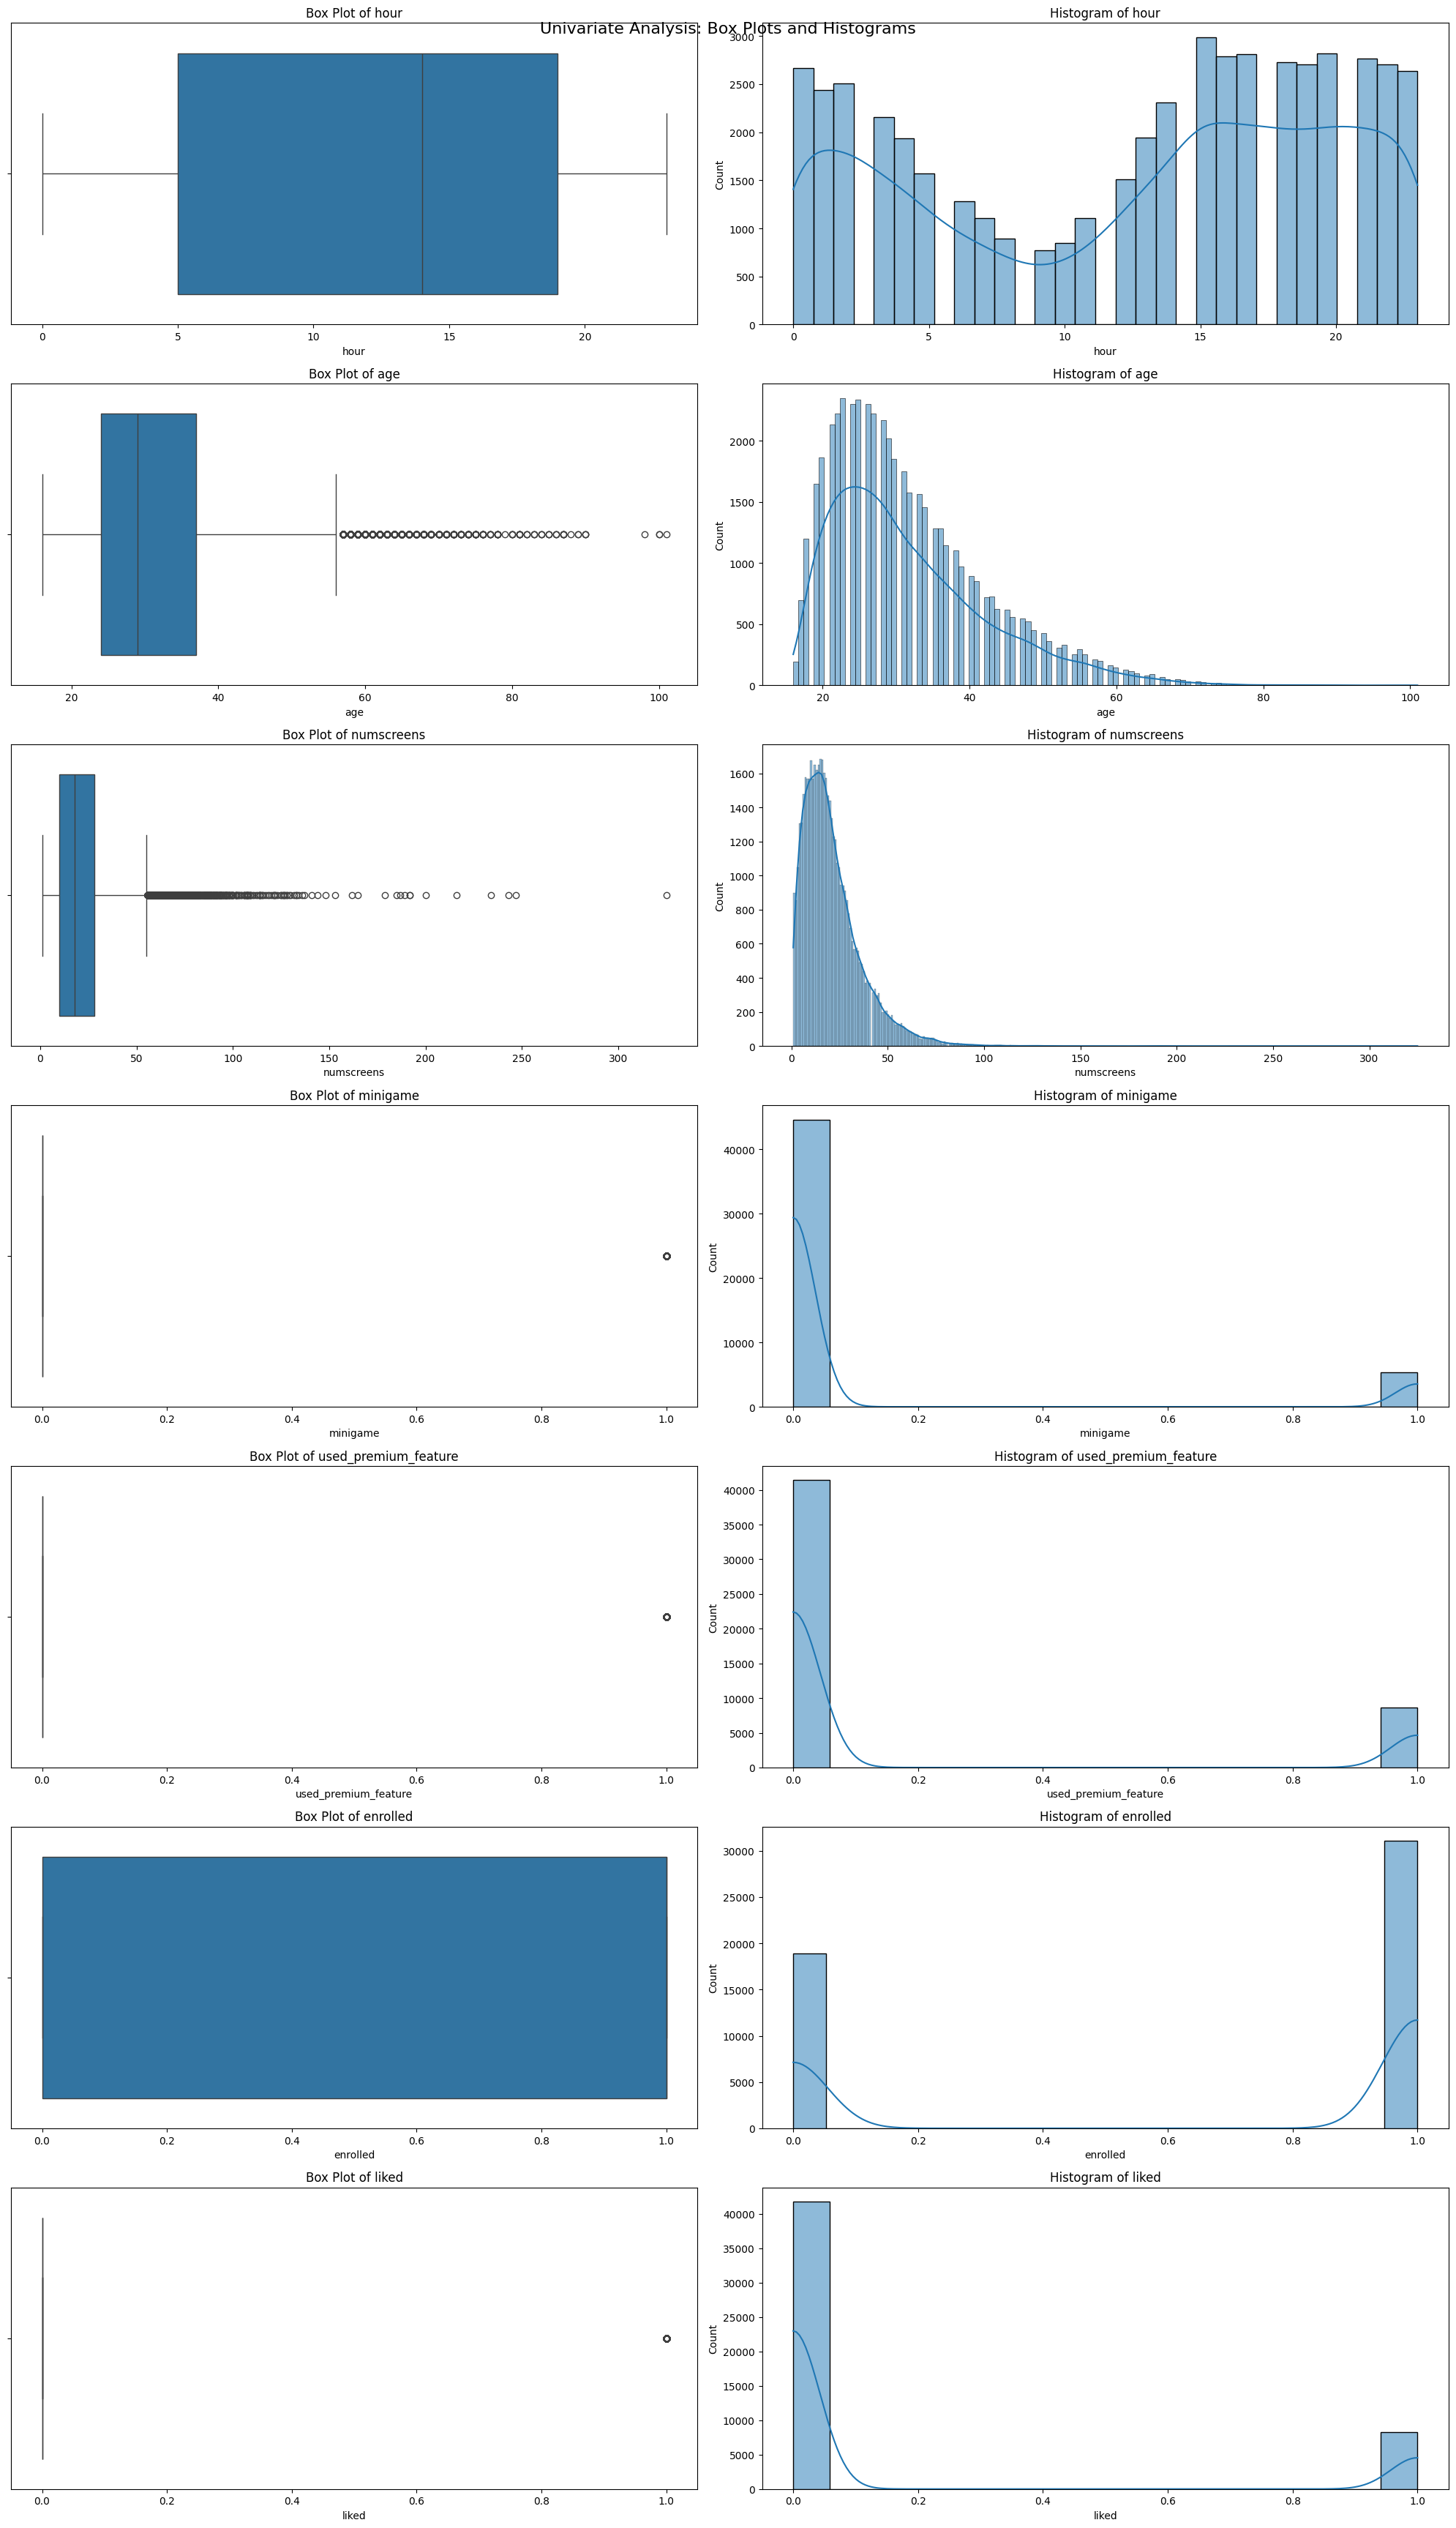

               hour           age    numscreens      minigame  \
count  49985.000000  49985.000000  49985.000000  49985.000000   
mean      12.557387     31.723777     21.096349      0.107812   
std        7.438224     10.803720     15.728734      0.310146   
min        0.000000     16.000000      1.000000      0.000000   
25%        5.000000     24.000000     10.000000      0.000000   
50%       14.000000     29.000000     18.000000      0.000000   
75%       19.000000     37.000000     28.000000      0.000000   
max       23.000000    101.000000    325.000000      1.000000   

       used_premium_feature      enrolled         liked  
count          49985.000000  49985.000000  49985.000000  
mean               0.171992      0.621526      0.165050  
std                0.377377      0.485011      0.371229  
min                0.000000      0.000000      0.000000  
25%                0.000000      0.000000      0.000000  
50%                0.000000      1.000000      0.000000  
75%     

In [15]:


# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Set up the matplotlib figure
fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(20, 5*len(numeric_columns)))
fig.suptitle('Univariate Analysis: Box Plots and Histograms', fontsize=16)

# Loop through each numeric column
for i, column in enumerate(numeric_columns):
    # Box plot
    sns.boxplot(x=df[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot of {column}')
    axes[i, 0].set_xlabel(column)

    # Histogram
    sns.histplot(df[column], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram of {column}')
    axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

# Print summary statistics
print(df[numeric_columns].describe())

# Identify potential outliers using IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Print outliers for each numeric column
for column in numeric_columns:
    outliers = identify_outliers(df, column)
    print(f"\nPotential outliers in {column}:")
    print(outliers[[column]])
    print(f"Number of potential outliers: {len(outliers)}")

Cross-validation scores: [0.62822242 0.73328837 0.73396283 0.73491719 0.7398636 ]
Mean CV score: 0.7141
Standard deviation of CV scores: 0.0430

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.77      8376
           1       0.17      0.32      0.22      1621

    accuracy                           0.64      9997
   macro avg       0.51      0.51      0.49      9997
weighted avg       0.73      0.64      0.68      9997



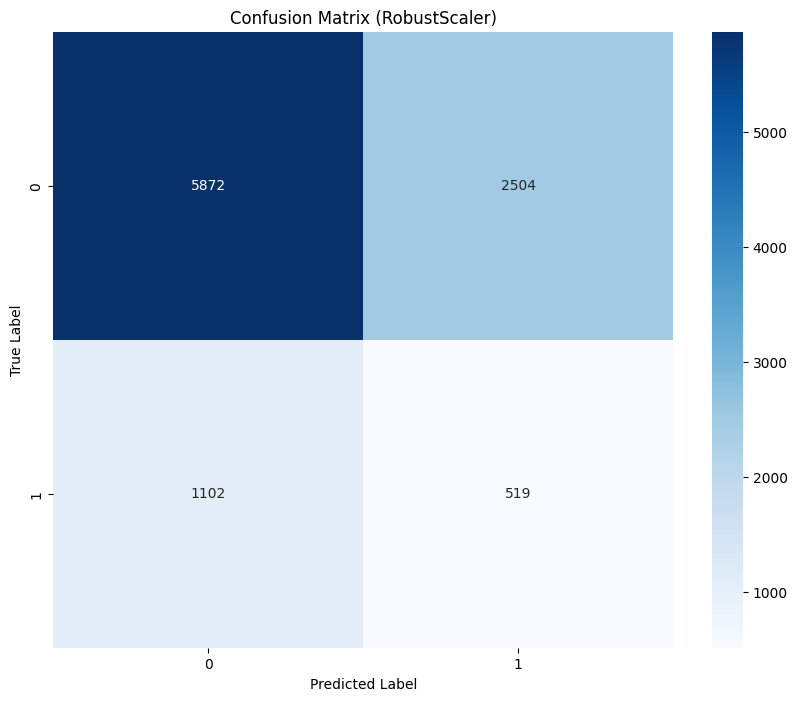

In [16]:


# Separate features and target
X = df.drop('liked', axis=1)
y = df['liked']

# Identify numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns

# Keep only numeric columns
X = X[numeric_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create the pipeline with RobustScaler
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=10))  # You can adjust the number of neighbors
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print(f"Mean CV score: {cv_scores.mean():.4f}")
print(f"Standard deviation of CV scores: {cv_scores.std():.4f}")

# Fit the pipeline on the entire resampled training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (RobustScaler)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Cross-validation scores: [0.70488609 0.80118405 0.79623801 0.79929551 0.80349247]
Mean CV score: 0.7810
Standard deviation of CV scores: 0.0381

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      8376
           1       0.16      0.23      0.19      1621

    accuracy                           0.67      9997
   macro avg       0.50      0.50      0.49      9997
weighted avg       0.73      0.67      0.70      9997



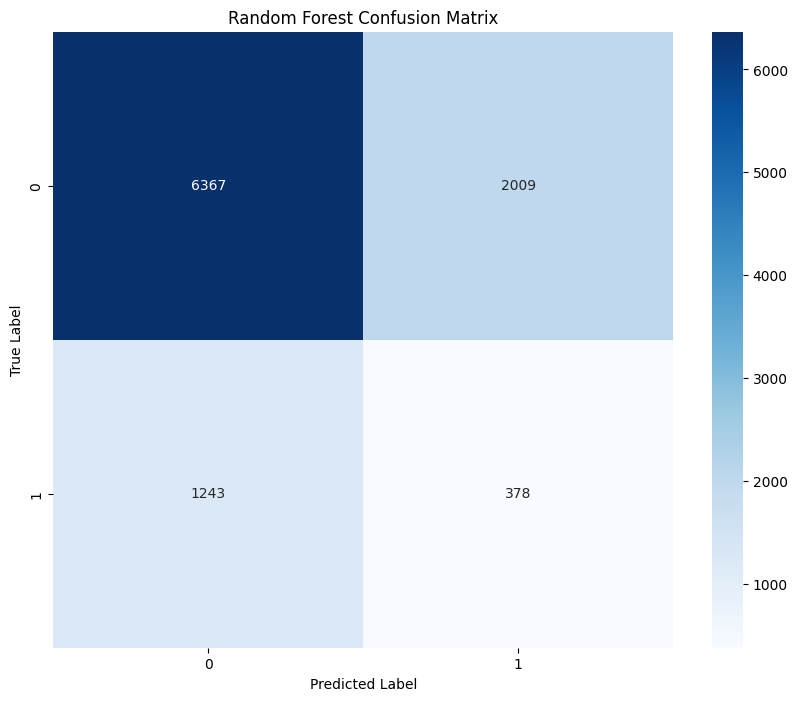

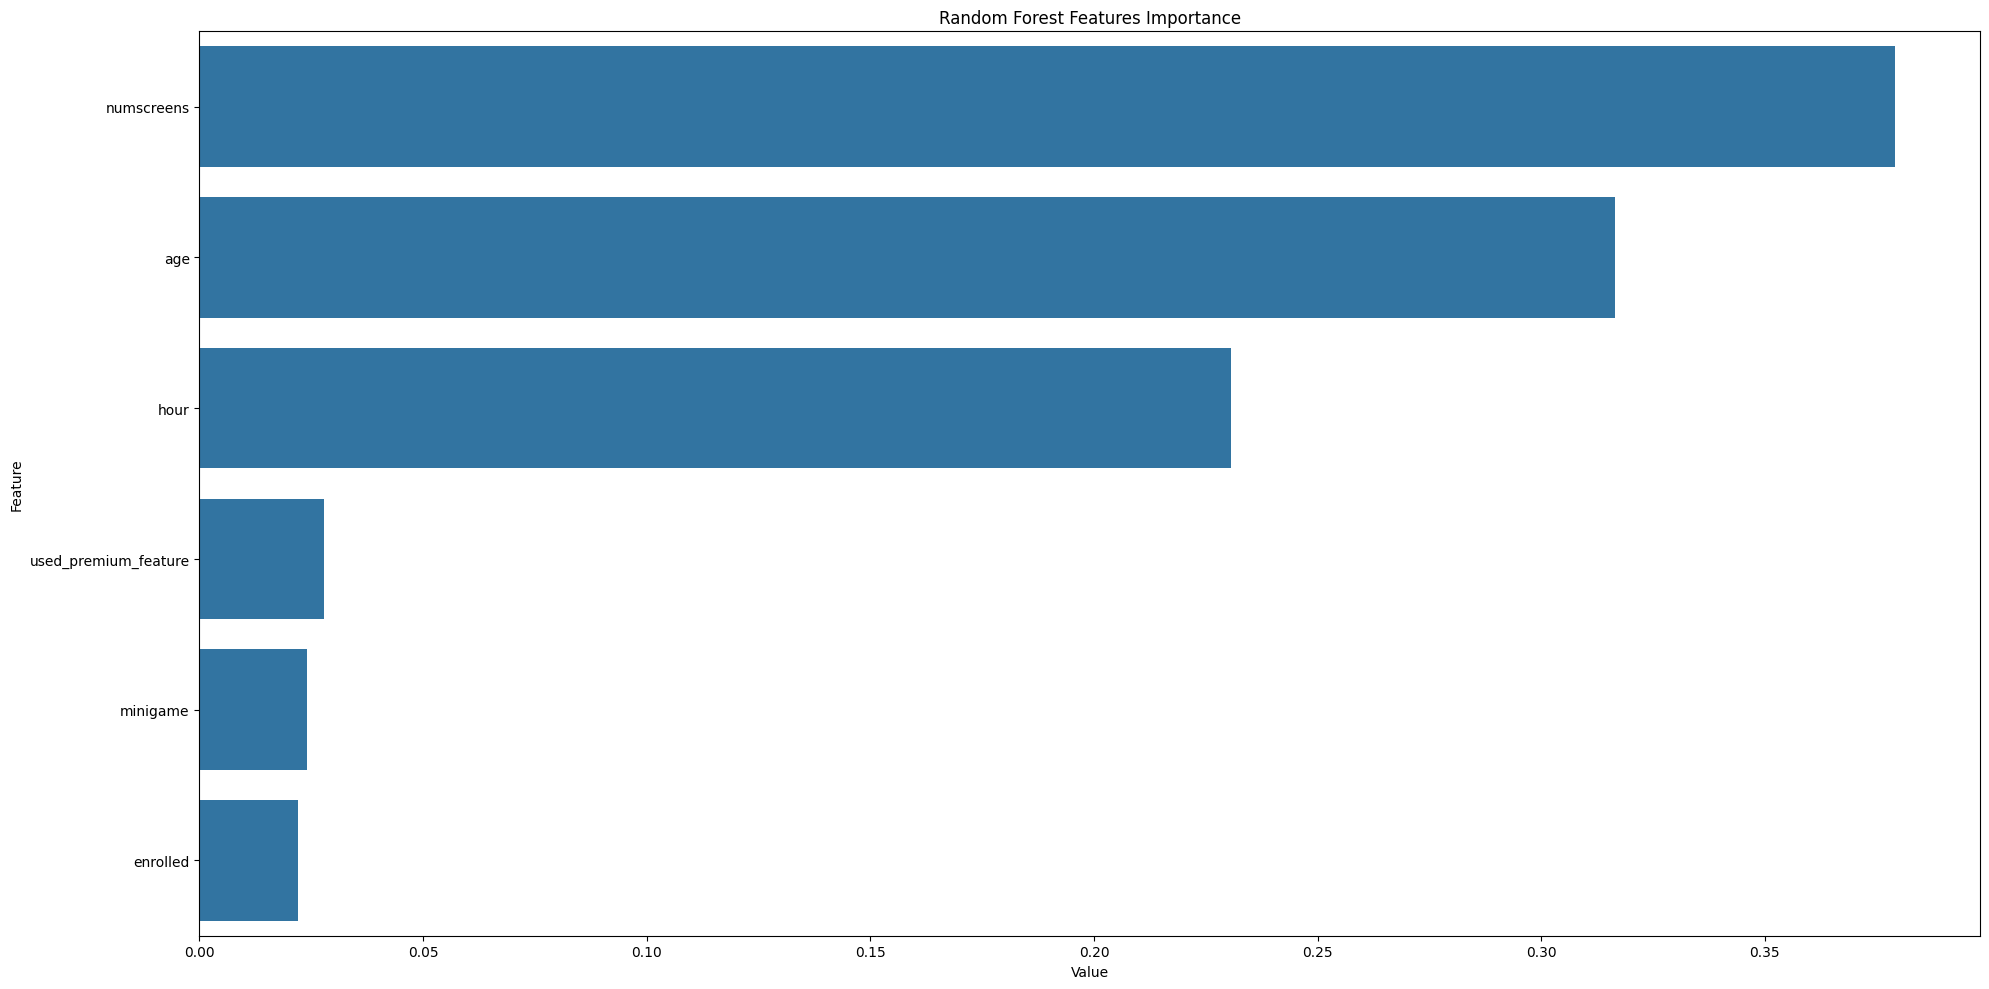

In [17]:




# Separate features and target
X = df.drop('liked', axis=1)
y = df['liked']

# Identify numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns

# Keep only numeric columns
X = X[numeric_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create Random Forest pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Perform cross-validation
cv_scores = cross_val_score(rf_pipeline, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print(f"Mean CV score: {cv_scores.mean():.4f}")
print(f"Standard deviation of CV scores: {cv_scores.std():.4f}")

# Fit the pipeline on the entire resampled training data
rf_pipeline.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_pipeline.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
importances = rf_pipeline.named_steps['rf'].feature_importances_
feature_imp = pd.DataFrame(sorted(zip(importances, X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Random Forest Features Importance')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found:  {'rf__n_estimators': 300, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_features': 'auto', 'rf__max_depth': 50, 'rf__bootstrap': True}
Best cross-validation score: 0.7821


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      8376
           1       0.16      0.23      0.19      1621

    accuracy                           0.67      9997
   macro avg       0.50      0.49      0.49      9997
weighted avg       0.73      0.67      0.70      9997



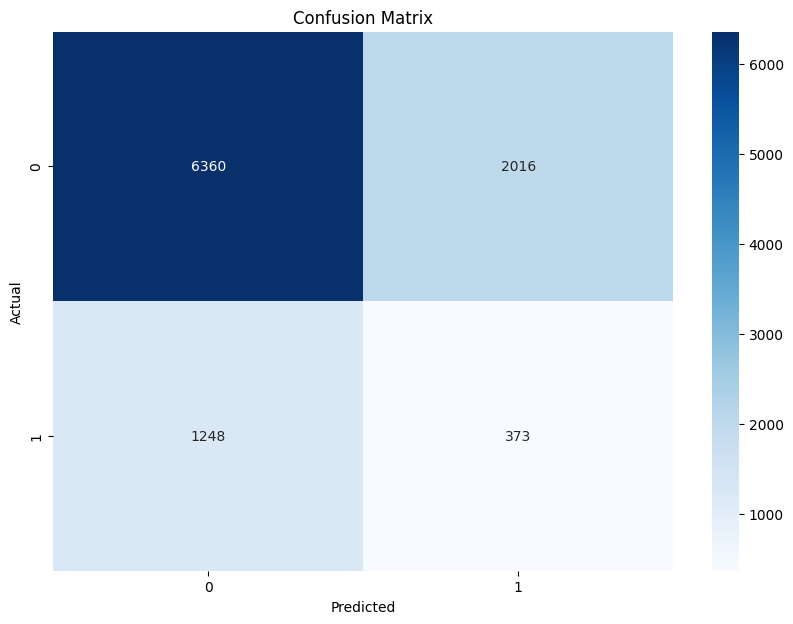

In [18]:

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV


# Assume df is your DataFrame and it's already loaded

# Split features and target
X = df.drop('liked', axis=1)
y = df['liked']

# Identify numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns

# Keep only numeric columns
X = X[numeric_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the Random Forest pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'rf__n_estimators': [100, 200, 300, 400, 500],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth': [None, 10, 20, 30, 40, 50],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf_pipeline, param_grid, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found: ", best_params)
print(f"Best cross-validation score: {best_score:.4f}")

# Fit the best model on the entire resampled training data
best_model = random_search.best_estimator_
best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
